Loading data files...
Successfully loaded data for 3 demos
Demo names: ['5G_Demonstration', '10B_Demonstration', '10G_Demonstration']

SUCCESS RATE COMPARISON


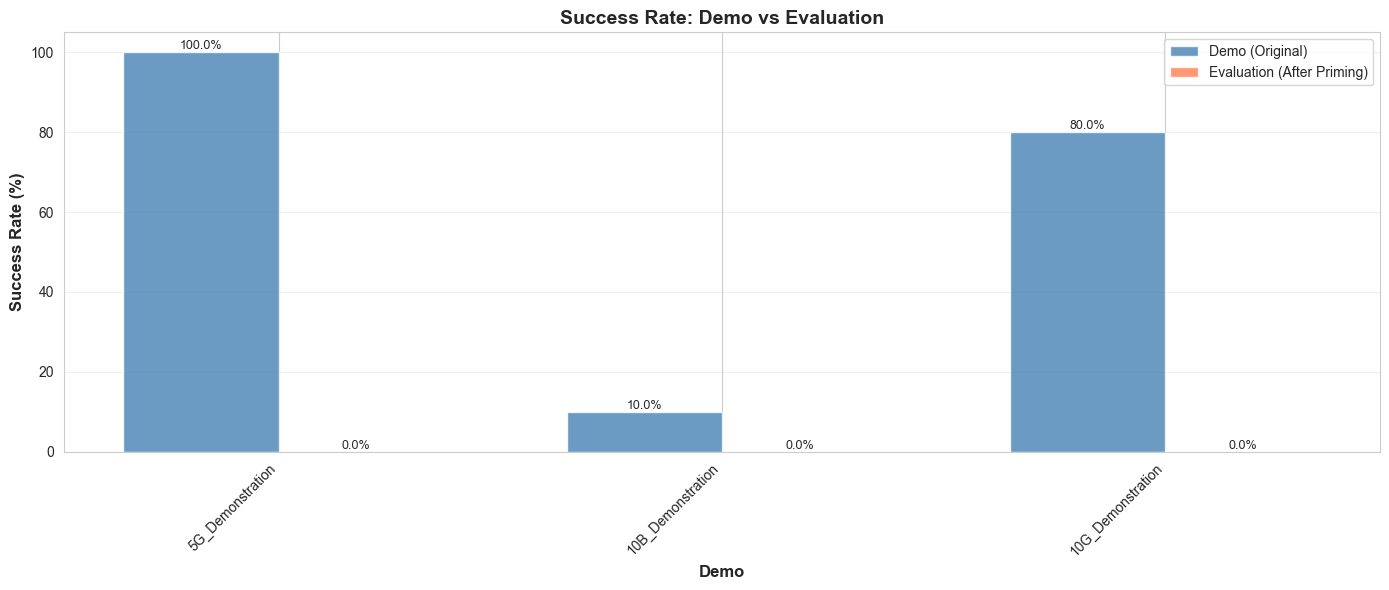


Success Rate Summary:
  5G_Demonstration: 100.0% -> 0.0% (down 100.0%)
  10B_Demonstration: 10.0% -> 0.0% (down 10.0%)
  10G_Demonstration: 80.0% -> 0.0% (down 80.0%)

VIOLATION RATE COMPARISON


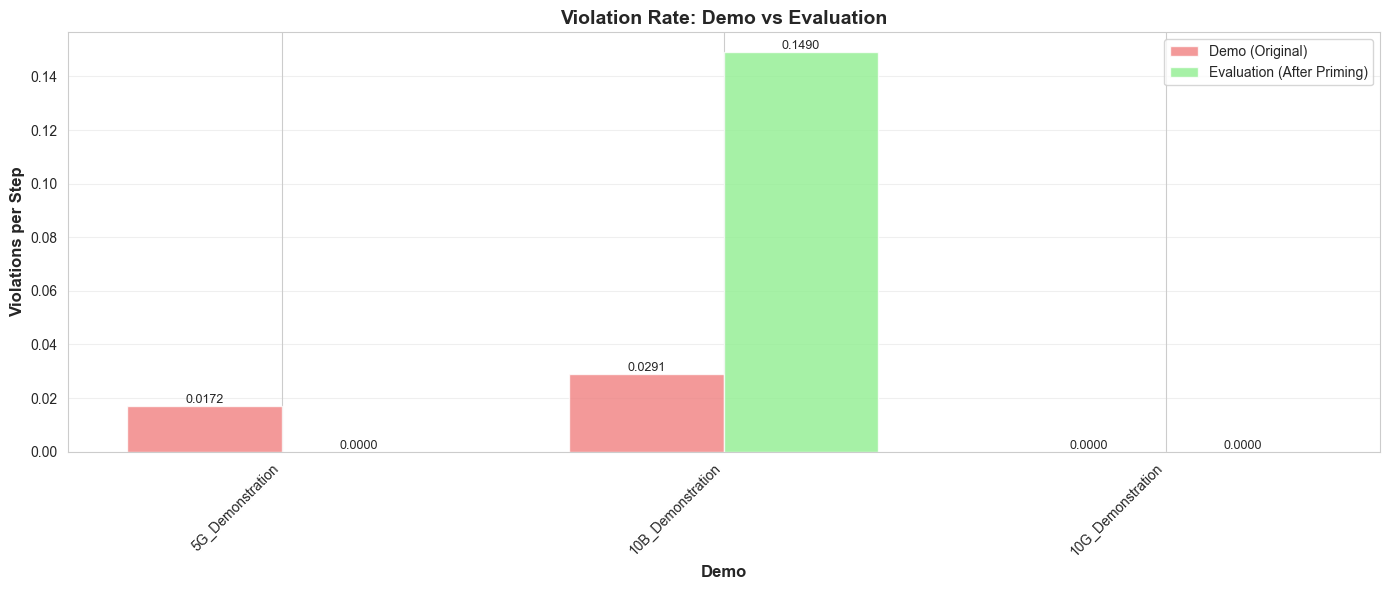


Violation Rate Summary:
  5G_Demonstration: 0.0172 -> 0.0000 (+100.0% change)
  10B_Demonstration: 0.0291 -> 0.1490 (-412.7% change)
  10G_Demonstration: 0.0000 -> 0.0000 (+0.0% change)

LEARNING CURVE


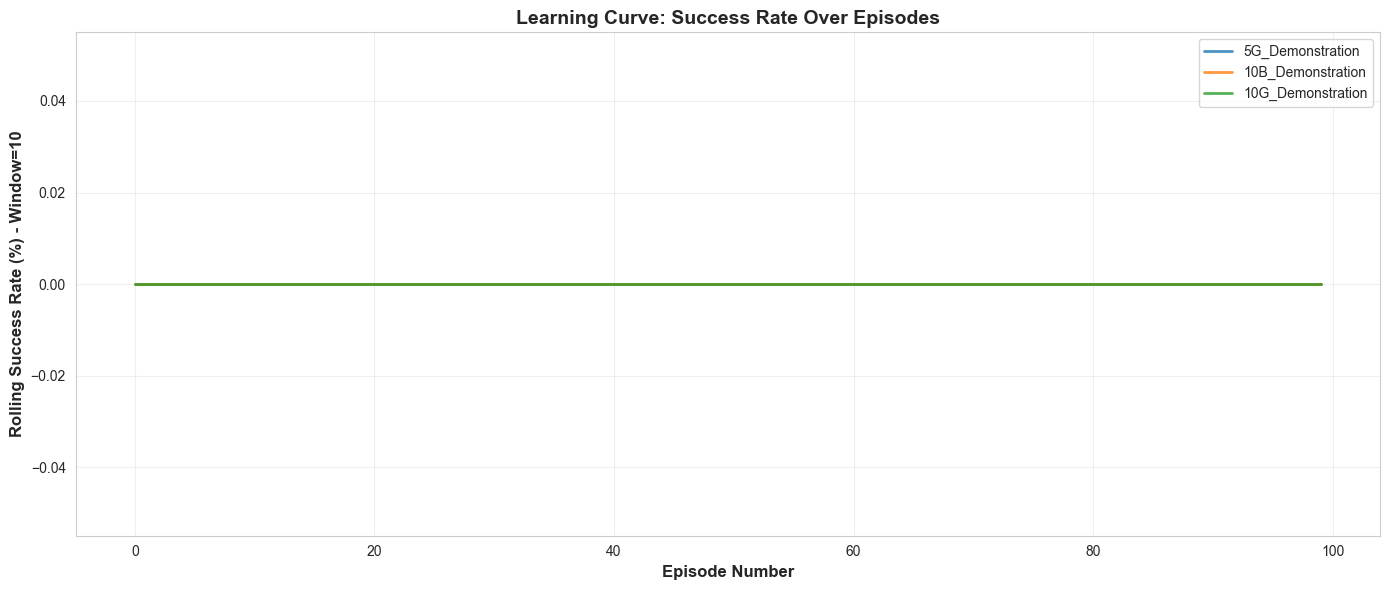


SUMMARY STATISTICS TABLE
             Demo  Demo Success %  Demo Avg Steps  Demo Violations  Eval Success %  Eval Avg Steps  Eval Violations  Improvement %
 5G_Demonstration           100.0           174.8               15             0.0               0                0      100.00000
10B_Demonstration            10.0           202.0               54             0.0               0            14900     -412.67037
10G_Demonstration            80.0           168.5                0             0.0               0                0        0.00000


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ============================================================================
# LOAD DATA
# ============================================================================

print("Loading data files...")

try:
    priming_df = pd.read_csv('demo_priming_metrics.csv')
    eval_df = pd.read_csv('evaluation_results.csv')
    summary_df = pd.read_csv('summary_statistics.csv')
    
    print(f"Successfully loaded data for {len(summary_df)} demos")
    print(f"Demo names: {summary_df['demo_name'].tolist()}")
    
except FileNotFoundError as e:
    print(f"Error: {e}")
    raise

# ============================================================================
# SUCCESS RATE COMPARISON: DEMO vs EVALUATION
# ============================================================================

print("\n" + "="*80)
print("SUCCESS RATE COMPARISON")
print("="*80)

fig, ax = plt.subplots(figsize=(14, 6))

demos = summary_df['demo_name']
x = np.arange(len(demos))
width = 0.35

demo_success = priming_df['demo_success_rate']
eval_success = summary_df['success_rate']

bars1 = ax.bar(x - width/2, demo_success, width, label='Demo (Original)', 
               color='steelblue', alpha=0.8)
bars2 = ax.bar(x + width/2, eval_success, width, label='Evaluation (After Priming)', 
               color='coral', alpha=0.8)

ax.set_xlabel('Demo', fontsize=12, fontweight='bold')
ax.set_ylabel('Success Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Success Rate: Demo vs Evaluation', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(demos, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\nSuccess Rate Summary:")
for idx, demo in enumerate(demos):
    change = eval_success.iloc[idx] - demo_success.iloc[idx]
    arrow = 'up' if change > 0 else 'down'
    print(f"  {demo}: {demo_success.iloc[idx]:.1f}% -> {eval_success.iloc[idx]:.1f}% "
          f"({arrow} {abs(change):.1f}%)")

# ============================================================================
# VIOLATION RATE COMPARISON
# ============================================================================

print("\n" + "="*80)
print("VIOLATION RATE COMPARISON")
print("="*80)

fig, ax = plt.subplots(figsize=(14, 6))

demos = summary_df['demo_name']
x = np.arange(len(demos))
width = 0.35

demo_viol = summary_df['violation_rate_demo']
eval_viol = summary_df['violation_rate_eval']

bars1 = ax.bar(x - width/2, demo_viol, width, label='Demo (Original)', 
               color='lightcoral', alpha=0.8)
bars2 = ax.bar(x + width/2, eval_viol, width, label='Evaluation (After Priming)', 
               color='lightgreen', alpha=0.8)

ax.set_xlabel('Demo', fontsize=12, fontweight='bold')
ax.set_ylabel('Violations per Step', fontsize=12, fontweight='bold')
ax.set_title('Violation Rate: Demo vs Evaluation', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(demos, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\nViolation Rate Summary:")
for idx, demo in enumerate(demos):
    improvement = summary_df['improvement_ratio'].iloc[idx]
    print(f"  {demo}: {demo_viol.iloc[idx]:.4f} -> {eval_viol.iloc[idx]:.4f} "
          f"({improvement:+.1f}% change)")


# ============================================================================
# LEARNING CURVE: SUCCESS RATE OVER EPISODES
# ============================================================================

print("\n" + "="*80)
print("LEARNING CURVE")
print("="*80)

fig, ax = plt.subplots(figsize=(14, 6))

for demo_name in eval_df['demo_name'].unique():
    demo_data = eval_df[eval_df['demo_name'] == demo_name].sort_values('episode_num')
    
    # Calculate rolling success rate (window of 10)
    window = 10
    rolling_success = demo_data['success'].rolling(window=window, min_periods=1).mean() * 100
    
    ax.plot(demo_data['episode_num'], rolling_success, label=demo_name, linewidth=2, alpha=0.8)

ax.set_xlabel('Episode Number', fontsize=12, fontweight='bold')
ax.set_ylabel('Rolling Success Rate (%) - Window=10', fontsize=12, fontweight='bold')
ax.set_title('Learning Curve: Success Rate Over Episodes', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# SUMMARY STATISTICS TABLE
# ============================================================================

print("\n" + "="*80)
print("SUMMARY STATISTICS TABLE")
print("="*80)

summary_table = pd.merge(
    priming_df[['demo_name', 'demo_success_rate', 'demo_avg_steps_success', 'priming_violations']],
    summary_df[['demo_name', 'success_rate', 'avg_steps_success', 'total_violations_eval', 'improvement_ratio']],
    on='demo_name'
)

summary_table.columns = ['Demo', 'Demo Success %', 'Demo Avg Steps', 'Demo Violations',
                        'Eval Success %', 'Eval Avg Steps', 'Eval Violations', 'Improvement %']

print(summary_table.to_string(index=False))